# Multinomial Logit Models
Multinomial logit models (MNL) are well known for its use in discrete choice problem. For instance, the choice of favourable places in the city by travellers. They might choose museum, cafe, exhibition, park, etc. Their choice could be influenced by visit duration, cost, distance, etc. MNL allows us to build such models to estimate the probability of choice.

## Description
This notebook is built based on a website in the reference. This is also part of my learning activities to better understand about MNL. Hopefuly, it will enable me finishing my manuscript regarding the MNL.

## References
https://library.virginia.edu/data/articles/getting-started-with-multinomial-logit-models

## Data Description
The data used in this notebook is alligator food choice taken from the text An Introduction to Categorical Data Analysis by Alan Agresti (1996, p. 207). The data contain information on 59 alligators sampled from a lake in Florida. It has the length of the alligator in meters and the primary food type found in the alligator’s stomach. The food type was classified into three categories: "Fish", "Invertebrate", and "Other".

We put additional `food` column as a factor and set the reference (or baseline) level to “Other” by placing it first in the `levels` and `labels` arguments to `factor()`.

In [3]:
gators <- read.csv('https://static.lib.virginia.edu/statlab/materials/data/table_8-1.csv')
gators$food <- factor(gators$food, 
                      levels = c("O", "F", "I"), 
                      labels = c("Other", "Fish", "Invertebrates"))
head(gators, 10)

,length,food
,<dbl>,<fct>
1,1.24,Invertebrates
2,1.45,Invertebrates
3,1.63,Invertebrates
4,1.78,Invertebrates
5,1.98,Invertebrates
6,2.36,Fish
7,2.79,Fish
8,3.68,Other
9,1.30,Invertebrates


In [3]:
# counts
table(gators$food)


        Other          Fish Invertebrates 
            8            31            20 

In [4]:
# proportions
prop.table(table(gators$food))


        Other          Fish Invertebrates 
    0.1355932     0.5254237     0.3389831 

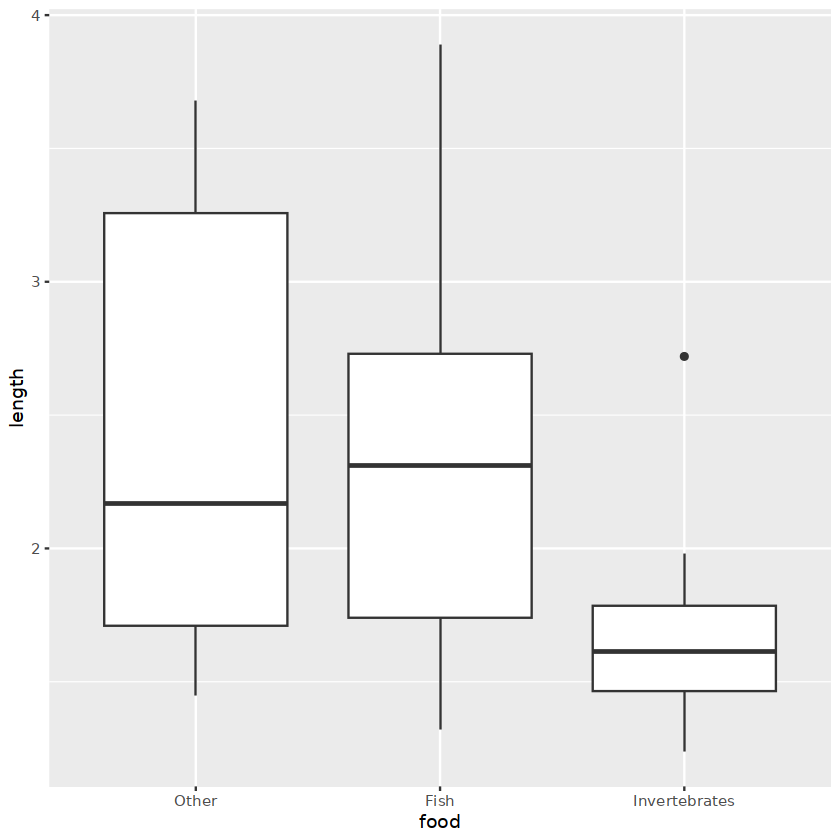

In [5]:
library(ggplot2)
ggplot(gators) +
  aes(x = food, y = length) +
  geom_boxplot()

## Modelling the choice
There many R packages available for modelling MNL. In this notebook we will try to use `nnet` and `mlogit`.

### Using multinom from nnet
To fit our model, we specify food to be modeled as a function of `length` using `food ~ length`. We specify `data = gators` so the function knows where to find the food and length variables. Finally, we specify `Hess = TRUE` to save something called the Hessian matrix, which is required to calculate coefficient standard errors, and we set `trace = FALSE` to suppress the printing of convergence progress.

In [4]:
library(nnet)
m <- multinom(food ~ length, data = gators, Hess = TRUE, trace = TRUE)

# weights:  9 (4 variable)
initial  value 64.818125 
iter  10 value 49.170785
final  value 49.170622 
converged


In [5]:
# get the model summary
summary(m, Wald.ratios = TRUE)

Call:
multinom(formula = food ~ length, data = gators, Hess = TRUE, 
    trace = TRUE)

Coefficients:
              (Intercept)     length
Fish             1.617952 -0.1101836
Invertebrates    5.697543 -2.4654695

Std. Errors:
              (Intercept)    length
Fish             1.307291 0.5170838
Invertebrates    1.793820 0.8996485

Value/SE (Wald statistics):
              (Intercept)     length
Fish             1.237637 -0.2130865
Invertebrates    3.176206 -2.7404808

Residual Deviance: 98.34124 
AIC: 106.3412 

### Output interpretation
In the "Coefficients" section, we're basically seeing two models:
1. one modeling the predictive effect of length on the log odds that an alligator prefers fish to other
2. the predictive effect of length on the log odds that an alligator prefers invertebrates to other.

In the "Coefficients" section, we're basically seeing two models, one modeling the predictive effect of length on the log odds that an alligator prefers fish to other, and the other modeling the predictive effect of length on the log odds that an alligator prefers invertebrates to other. 

> The smaller the standard error in relation to the coefficient, the more precise the estimate

Wald statistics, presents the ratio of the coefficients to the standard errors. 

> The farther away the ratio is from 0, the more precise the estimate and the more likely it’s either positive or negative.

This is no different from the output of other regression models. It’s just presented differently due to the fact we’re summarizing two models. Wald statistics larger than 2 provide evidence that effects are reliably positive or negative. If you must report p-values, you’ll have to calculate them manually. Here’s one way using the standard normal approximation:

In [5]:
s <- summary(m, Wald.ratios = TRUE)
p <- 2 * pnorm(abs(s$Wald.ratios), lower.tail = FALSE)
p

,(Intercept),length
Fish,0.215850665,0.831259475
Invertebrates,0.001492149,0.006134937


The `length` coefficient for the "Invertebrates" model is negative (-2.46) and has a large Wald statistic (greater than 2). It appears that the longer an alligator is, the less likely it is to eat invertebrates instead of "other."

In [13]:
# calculate confidence intervals
confint(m)

, , Fish

                 2.5 %    97.5 %
(Intercept) -0.9442917 4.1801963
length      -1.1236492 0.9032821

, , Invertebrates

                2.5 %     97.5 %
(Intercept)  2.181720  9.2133667
length      -4.228748 -0.7021908

In [2]:
library(car)
Anova(m)

Loading required package: carData



ERROR: Error in eval(expr, envir, enclos): object 'm' not found


The result is a test of whether or not the `length` coefficient in both baseline logit models is plausibly 0. The null is that a model with just an intercept is equally as good as a model with an intercept and length. (An intercept-only model is the same as simply using the observed proportions in each food category as a basis for making predictions about an alligator’s food choice.) The small $p$-value (p = 0.0002248) provides evidence against the null and leads us to keep `length` in our model.

### Using mlogit package
This library 

In [6]:
library(mlogit) 

Loading required package: dfidx


Attaching package: ‘dfidx’


The following object is masked from ‘package:stats’:

    filter




In [7]:
longGators = mlogit.data(gators, shape="wide", choice = "food")
head(longGators)
#m2 = mlogit(food ~ 0 | length, data = gators)

~~~~~~~
 first 10 observations out of 177 
~~~~~~~
   length  food chid           alt    idx
1    1.24 FALSE    1          Fish 1:Fish
2    1.24  TRUE    1 Invertebrates 1:ates
3    1.24 FALSE    1         Other 1:ther
4    1.45 FALSE    2          Fish 2:Fish
5    1.45  TRUE    2 Invertebrates 2:ates
6    1.45 FALSE    2         Other 2:ther
7    1.63 FALSE    3          Fish 3:Fish
8    1.63  TRUE    3 Invertebrates 3:ates
9    1.63 FALSE    3         Other 3:ther
10   1.78 FALSE    4          Fish 4:Fish

~~~ indexes ~~~~
   chid           alt
1     1          Fish
2     1 Invertebrates
3     1         Other
4     2          Fish
5     2 Invertebrates
6     2         Other
7     3          Fish
8     3 Invertebrates
9     3         Other
10    4          Fish
indexes:  1, 2 


In [8]:
m2 = mlogit(food ~ 0 | length, data = longGators)
summary(m2)


Call:
mlogit(formula = food ~ 0 | length, data = longGators, method = "nr")

Frequencies of alternatives:choice
         Fish Invertebrates         Other 
      0.52542       0.33898       0.13559 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 6.55E-08 
gradient close to zero 

Coefficients :
                          Estimate Std. Error z-value Pr(>|z|)   
(Intercept):Invertebrates  4.07971    1.46864  2.7779 0.005471 **
(Intercept):Other         -1.61773    1.30727 -1.2375 0.215908   
length:Invertebrates      -2.35534    0.80329 -2.9321 0.003367 **
length:Other               0.11011    0.51708  0.2129 0.831371   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -49.171
McFadden R^2:  0.14591 
Likelihood ratio test : chisq = 16.801 (p.value = 0.0002248)

In [9]:
lrtest(m2)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,-49.17062,NA,NA,NA
2,4,-49.17062,0,0,1


In [20]:
scoretest(m2, heterosc = TRUE)


	score test

data:  heterosc = TRUE
chisq = 1.4869, df = 2, p-value = 0.4755
alternative hypothesis: heteroscedastic model


In [22]:
waldtest(m2, heterosc = TRUE)

ERROR: Error in waldtest.mlogit(m2, heterosc = TRUE): object 'su' not found


In [33]:
linearHypothesis(m2, c("length:Invertebrates = 1", "length:Other = 1"))

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,57,NA,NA,NA
2,55,2,18.91408,7.813756e-05


In [37]:
m3 = mlogit(food ~ length | 0, data = longGators)
summary(m3)


Call:
mlogit(formula = food ~ length | 0, data = longGators, method = "nr")

Frequencies of alternatives:choice
         Fish Invertebrates         Other 
      0.52542       0.33898       0.13559 

nr method
1 iterations, 0h:0m:0s 
g'(-H)^-1g = 1E+10 
last step couldn't find higher value 

Coefficients :
         Estimate Std. Error z-value Pr(>|z|)
length 0.0000e+00 6.5004e+14       0        1

Log-Likelihood: -64.818

In [11]:
predictFood <- data.frame(
    length = c(1.78, 1.9, 2.35, 2.78, 3.68),
    food = c("Invertebrates", "Invertebrates", "Fish", "Fish", "Other")
)

#predictFood
gatorPredict = mlogit.data(predictFood, shape="wide", choice = "food")
head(gatorPredict)

~~~~~~~
 first 10 observations out of 15 
~~~~~~~
   length  food chid           alt    idx
1    1.78 FALSE    1          Fish 1:Fish
2    1.78  TRUE    1 Invertebrates 1:ates
3    1.78 FALSE    1         Other 1:ther
4    1.90 FALSE    2          Fish 2:Fish
5    1.90  TRUE    2 Invertebrates 2:ates
6    1.90 FALSE    2         Other 2:ther
7    2.35  TRUE    3          Fish 3:Fish
8    2.35 FALSE    3 Invertebrates 3:ates
9    2.35 FALSE    3         Other 3:ther
10   2.78  TRUE    4          Fish 4:Fish

~~~ indexes ~~~~
   chid           alt
1     1          Fish
2     1 Invertebrates
3     1         Other
4     2          Fish
5     2 Invertebrates
6     2         Other
7     3          Fish
8     3 Invertebrates
9     3         Other
10    4          Fish
indexes:  1, 2 


In [12]:
prediction <- predict(m2, gatorPredict)
prediction

,Fish,Invertebrates,Other
1,0.4684641,0.41849806,0.1130378
2,0.5214048,0.35110976,0.1274855
3,0.6710295,0.15656694,0.1724035
4,0.7384844,0.06258187,0.1989337
5,0.7647495,0.00778050,0.2274700


In [13]:
prediction2 <- predict(m2, longGators)
summary(prediction2)

      Fish        Invertebrates          Other        
 Min.   :0.2265   Min.   :0.004734   Min.   :0.05151  
 1st Qu.:0.3726   1st Qu.:0.127685   1st Qu.:0.08792  
 Median :0.4998   Median :0.378641   Median :0.12154  
 Mean   :0.5254   Mean   :0.338983   Mean   :0.13559  
 3rd Qu.:0.6924   3rd Qu.:0.539445   3rd Qu.:0.17987  
 Max.   :0.7651   Max.   :0.721964   Max.   :0.23226  

,individual,mode,choice,wait,vcost,travel,gcost,income,size
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,air,no,69,59,100,70,35,1
2,1,train,no,34,31,372,71,35,1
3,1,bus,no,35,25,417,70,35,1
4,1,car,yes,0,10,180,30,35,1
5,2,air,no,64,58,68,68,30,2
6,2,train,no,44,31,354,84,30,2



      air     train       bus       car 
0.2761905 0.3000000 0.1428571 0.2809524 


Call:
mlogit(formula = choice ~ gcost + wait + incair, data = TravelMode, 
    reflevel = "car", shape = "long", alt.var = "mode", method = "nr")

Frequencies of alternatives:choice
    car     air   train     bus 
0.28095 0.27619 0.30000 0.14286 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 0.000234 
successive function values within tolerance limits 

Coefficients :
                   Estimate Std. Error z-value  Pr(>|z|)    
(Intercept):air    5.207433   0.779055  6.6843 2.320e-11 ***
(Intercept):train  3.869036   0.443127  8.7312 < 2.2e-16 ***
(Intercept):bus    3.163190   0.450266  7.0252 2.138e-12 ***
gcost             -0.015501   0.004408 -3.5167  0.000437 ***
wait              -0.096125   0.010440 -9.2075 < 2.2e-16 ***
incair             0.013287   0.010262  1.2947  0.195414    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -199.13
McFadden R^2:  0.29825 
Likelihood ratio test : chisq = 169.26 (p.value = < 2.22e-16)

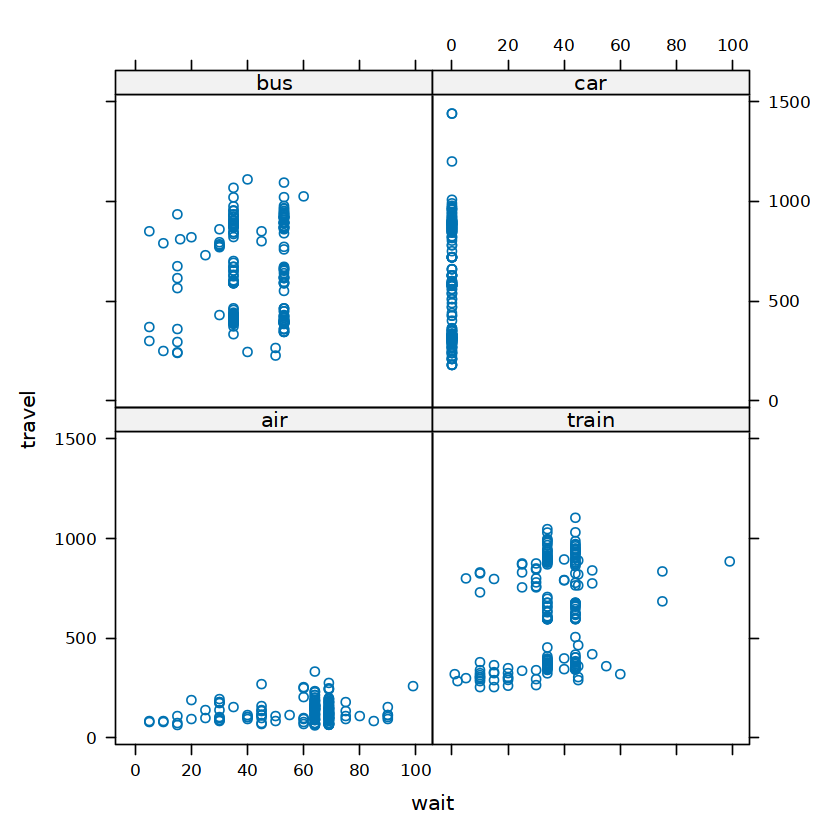

In [15]:
data("TravelMode", package = "AER")

head(TravelMode)

## overall proportions for chosen mode
with(TravelMode, prop.table(table(mode[choice == "yes"])))

## travel vs. waiting time for different travel modes
library("lattice")
xyplot(travel ~ wait | mode, data = TravelMode)

## Greene (2003), Table 21.11, conditional logit model
if(require("mlogit")) {
TravelMode$incair <- with(TravelMode, income * (mode == "air"))
tm_cl <- mlogit(choice ~ gcost + wait + incair, data = TravelMode,
  shape = "long", alt.var = "mode", reflevel = "car")
summary(tm_cl)
}

In [17]:
wd.test <- waldtest(tm_cl, heterosc = FALSE)
wd.test

ERROR: Error in waldtest.mlogit(tm_cl, heterosc = FALSE): object 'su' not found


In [18]:
tm_cl2 <- mlogit(choice ~ gcost + wait + incair, data = TravelMode,
  shape = "long", alt.var = "mode", reflevel = "car", heterosc = TRUE)

summary(tm_cl2)


Call:
mlogit(formula = choice ~ gcost + wait + incair, data = TravelMode, 
    reflevel = "car", heterosc = TRUE, shape = "long", alt.var = "mode")

Frequencies of alternatives:choice
    car     air   train     bus 
0.28095 0.27619 0.30000 0.14286 

bfgs method
43 iterations, 0h:0m:1s 
g'(-H)^-1g = 3.77E-07 
gradient close to zero 

Coefficients :
                   Estimate Std. Error z-value Pr(>|z|)
(Intercept):air    7.832450  10.950706  0.7152   0.4745
(Intercept):train  7.171867   9.135295  0.7851   0.4324
(Intercept):bus    6.865775   8.829608  0.7776   0.4368
gcost             -0.051562   0.069444 -0.7425   0.4578
wait              -0.196843   0.288274 -0.6828   0.4947
incair             0.040253   0.060680  0.6634   0.5071
sp.air             4.024020   5.977821  0.6732   0.5008
sp.train           3.854208   6.220456  0.6196   0.5355
sp.bus             1.648749   2.826916  0.5832   0.5597

Log-Likelihood: -195.66
McFadden R^2:  0.31047 
Likelihood ratio test : chisq = 176.2 (

In [22]:
waldtest(tm_cl2, heterosc = TRUE)


	Wald test

data:  homoscedasticity
chisq = 3.6356, df = 3, p-value = 0.3036


In [19]:
lrtest(tm_cl, tm_cl2)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,-199.1284,NA,NA,NA
2,9,-195.6605,3,6.935712,0.07397531


In [20]:
lrtest(tm_cl2, tm_cl)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,-195.6605,NA,NA,NA
2,6,-199.1284,-3,6.935712,0.07397531
